In [121]:
import numpy as np
import pandas as pd

In [122]:
import pandas as pd
dt_train = pd.read_csv("train.csv")

In [123]:
dt_train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [124]:
dt_train.columns 

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [125]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [126]:
#value_counts()
dt_train['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [127]:
dt_train['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [128]:
dt_train['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [129]:
dt_train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


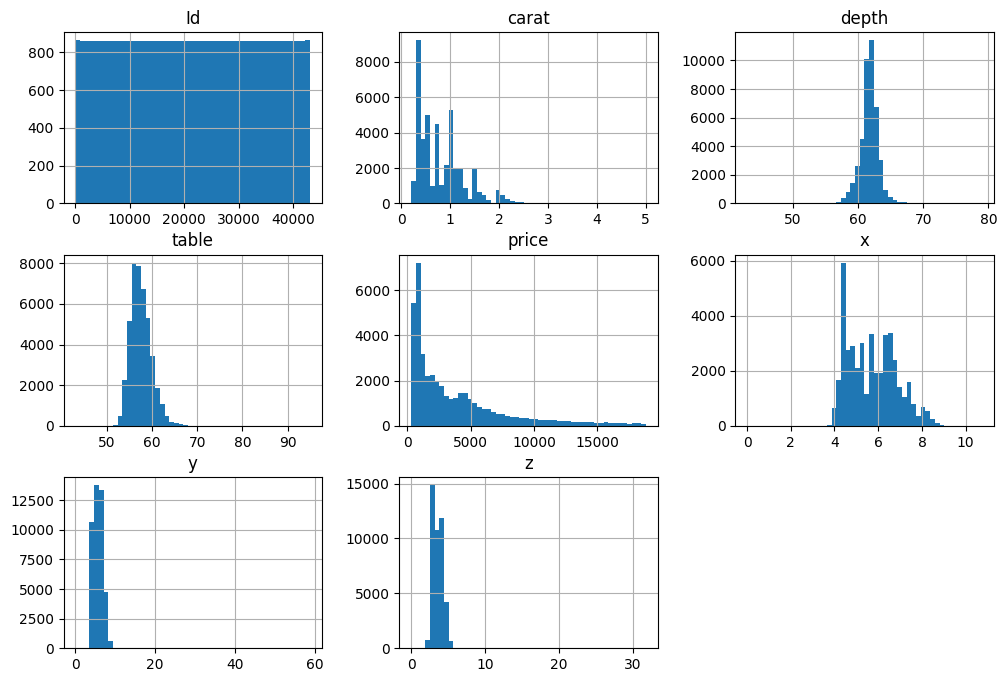

In [130]:
import matplotlib.pyplot as plt
dt_train.hist(bins=50, figsize=(12, 8))
plt.show()

In [131]:
corr_matrix = dt_train.corr()
corr_matrix

<ipython-input-131-c432601647c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dt_train.corr()


,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


<ipython-input-132-7a714791f7ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dt_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


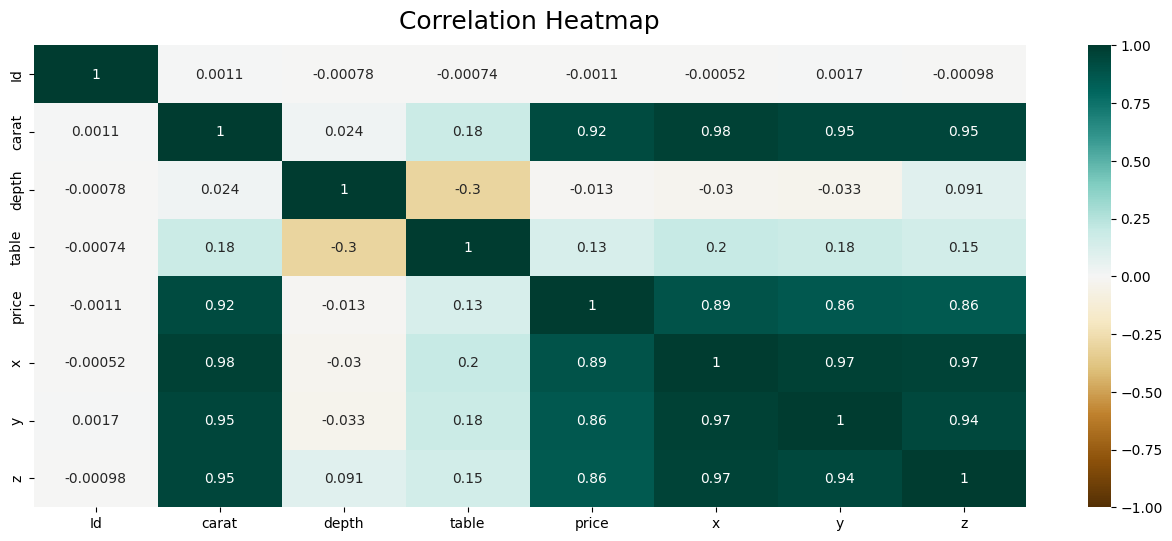

In [132]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dt_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

###correlation price with other attributes 

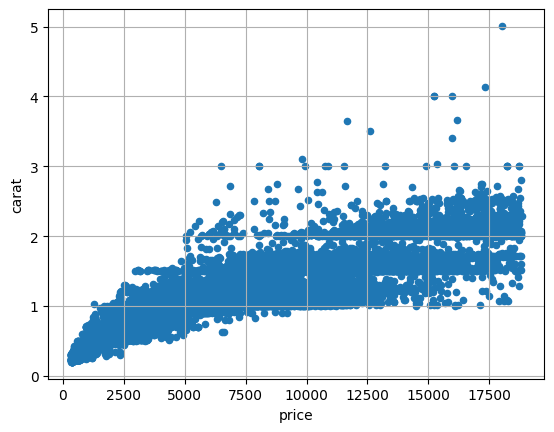

In [133]:
dt_train.plot(kind="scatter", x="price", y="carat", grid=True)
plt.show()

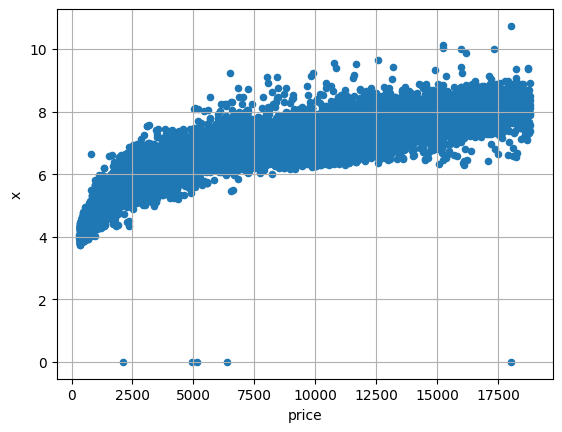

In [134]:
dt_train.plot(kind="scatter", x="price", y="x", grid=True)
plt.show()

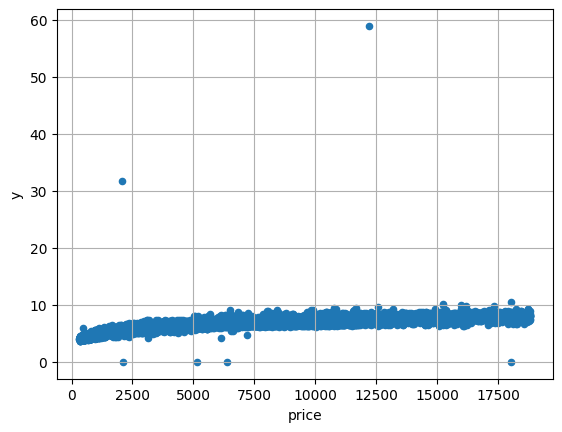

In [135]:
dt_train.plot(kind="scatter", x="price", y="y", grid=True)
plt.show()

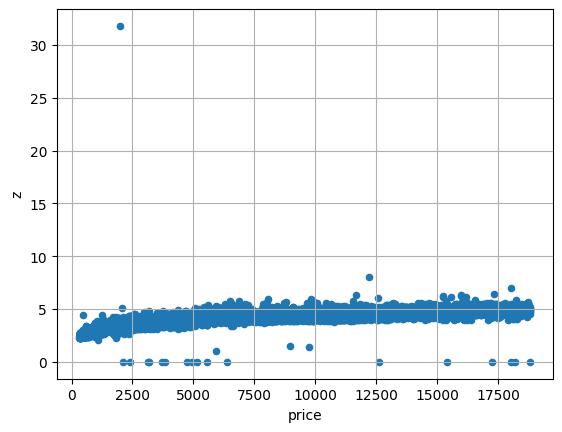

In [136]:
dt_train.plot(kind="scatter", x="price", y="z", grid=True)
plt.show()

##preprocesse data

####find nan value

In [137]:
dt_train.isnull().sum()


Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [138]:
# dt_train.notnull()

In [139]:
dt_train = dt_train[(dt_train[['x','y','z']] != 0).all(axis=1)]

In [140]:
dt_train.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##outliers

<Axes: >

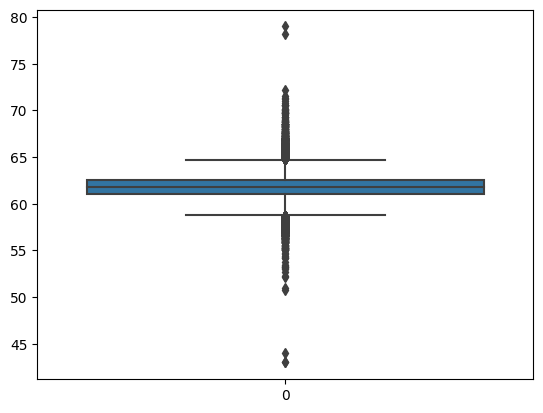

In [141]:
sns.boxplot(dt_train['depth'])

<Axes: >

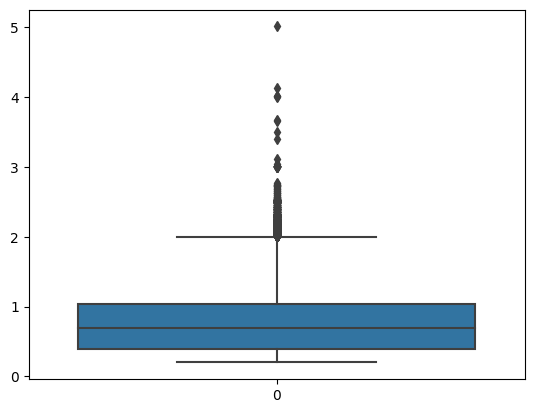

In [142]:
sns.boxplot(dt_train['carat'])

<Axes: >

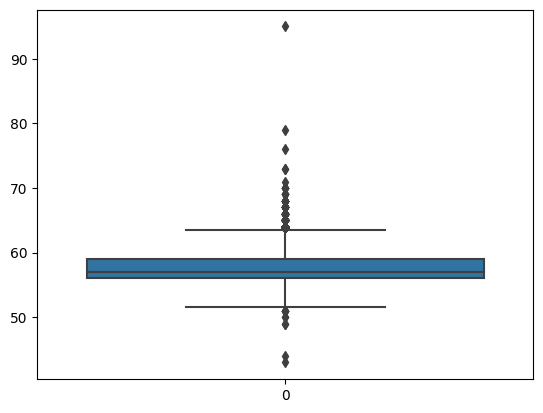

In [143]:

sns.boxplot(dt_train['table'])

In [144]:
##proccess outliers
def outpros(x):
    percentile25= x.quantile(0.25)
    percentile75=x.quantile(0.75)
    iqr=percentile75-percentile25
    upperLimit= percentile75+1.5*iqr
    lowerLimit= percentile25-1.5*iqr
    return upperLimit, lowerLimit

<Axes: >

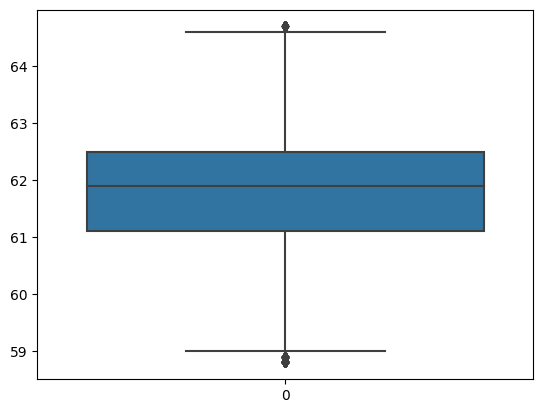

In [145]:
#removing outliers from depth
upper,lower= outpros(dt_train['depth'])
dt_train= dt_train[dt_train['depth'] < upper]
dt_train= dt_train[dt_train['depth']>lower]
sns.boxplot(dt_train['depth'])

<Axes: >

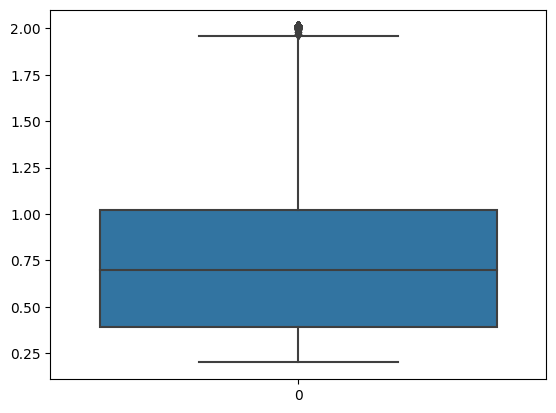

In [146]:
#removing outliers from carat
upper,lower= outpros(dt_train['carat'])
dt_train= dt_train[dt_train['carat'] < upper]
dt_train= dt_train[dt_train['carat']>lower]
sns.boxplot(dt_train['carat'])

<Axes: >

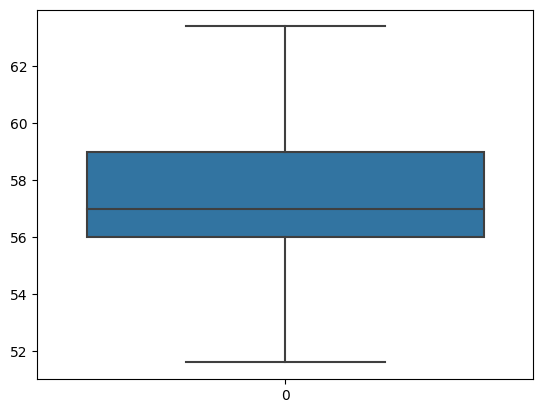

In [147]:
#removing outliers from table
upper,lower= outpros(dt_train['table'])
dt_train= dt_train[dt_train['table'] < upper]
dt_train= dt_train[dt_train['table']>lower]
sns.boxplot(dt_train['table'])

###Text and Categorical Attributes

In [148]:
dt_train_cat=dt_train[['cut']]
dt_train_cat

,cut
0,Ideal
1,Premium
2,Ideal
3,Ideal
4,Premium
...,...
43147,Ideal
43148,Very Good
43149,Premium
43150,Premium


In [149]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dt_train_encoded = ordinal_encoder.fit_transform(dt_train_cat)

In [150]:
dt_train_encoded[:6]

array([[2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [4.]])

In [151]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(dt_train_cat)

In [152]:
train_cat_1hot

<39753x5 sparse matrix of type '<class 'numpy.float64'>'
	with 39753 stored elements in Compressed Sparse Row format>

In [153]:
train_cat_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [154]:
dt_train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [155]:
dt_train['volume']= dt_train['x']*dt_train['y']*dt_train["z"] 
dt_train=dt_train.drop(['x','y','z'], axis=1)
dt_train.head()

,Id,carat,cut,color,clarity,depth,table,price,volume
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200


In [156]:
corr_matrix2 = dt_train.corr()

<ipython-input-156-90dd7761bc93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = dt_train.corr()


<ipython-input-157-7a714791f7ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dt_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


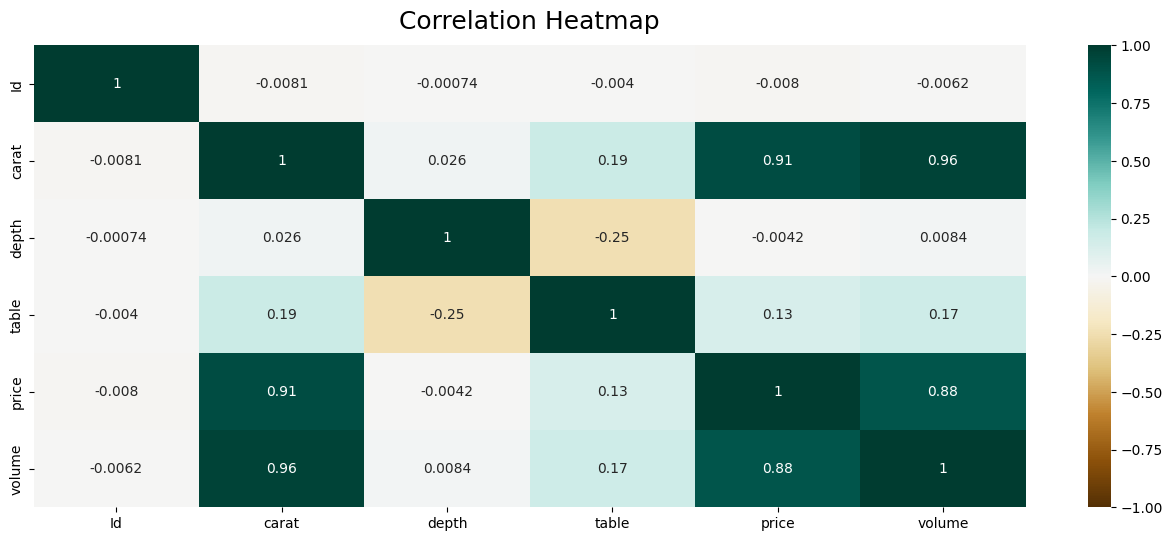

In [157]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dt_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [158]:
train = dt_train.drop("price", axis=1)
train_labels = dt_train["price"].copy()
train_labels

0         4270
1        15164
2          828
3         1577
4         2596
         ...  
43147     1760
43148     3016
43149      990
43150      734
43151      743
Name: price, Length: 39753, dtype: int64

In [159]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

train = dt_train.drop("price", axis=1)
train_labels = dt_train["price"].copy()
####
num_pipeline = Pipeline([
 #('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler())])

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_attribs = ['carat','table','volume']
cat_attribs = ['cut', 'color', 'clarity']
cat_pipeline = make_pipeline(
#SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])

In [161]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train, train_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'table', 'volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

In [162]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]

In [163]:
price_predictions = lin_reg.predict(train)
price_predictions[:5].round(-2)

array([ 4200., 11500.,   300.,  2000.,  3800.])

In [164]:
from sklearn.metrics import mean_squared_error

In [165]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(train_labels,
price_predictions,squared=False)
lin_rmse

1073.064665855869

In [166]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,
DecisionTreeRegressor(random_state=42))
tree_reg.fit(train, train_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'table', 'volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [167]:
price_predictions = tree_reg.predict(train)

In [168]:
from sklearn.metrics import mean_squared_error
tree_rmse = mean_squared_error(train_labels,
price_predictions,squared=False)
tree_rmse

34.421795208993764

In [169]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
RandomForestRegressor(random_state=42))
forest_reg.fit(train, train_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'table', 'volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [170]:
price_predictions = forest_reg.predict(train)

In [171]:
from sklearn.metrics import mean_squared_error
forest_rmse = mean_squared_error(train_labels,
price_predictions,squared=False)
forest_rmse

180.11564293950795